In [1]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage as ndi
from skimage import (
    color, feature, filters, measure, segmentation, io
)
import numpy as np
import pandas as pd
import os

In [2]:
# input
img = cv2.imread('FigureS1_B_raw.jpg', cv2.IMREAD_GRAYSCALE)

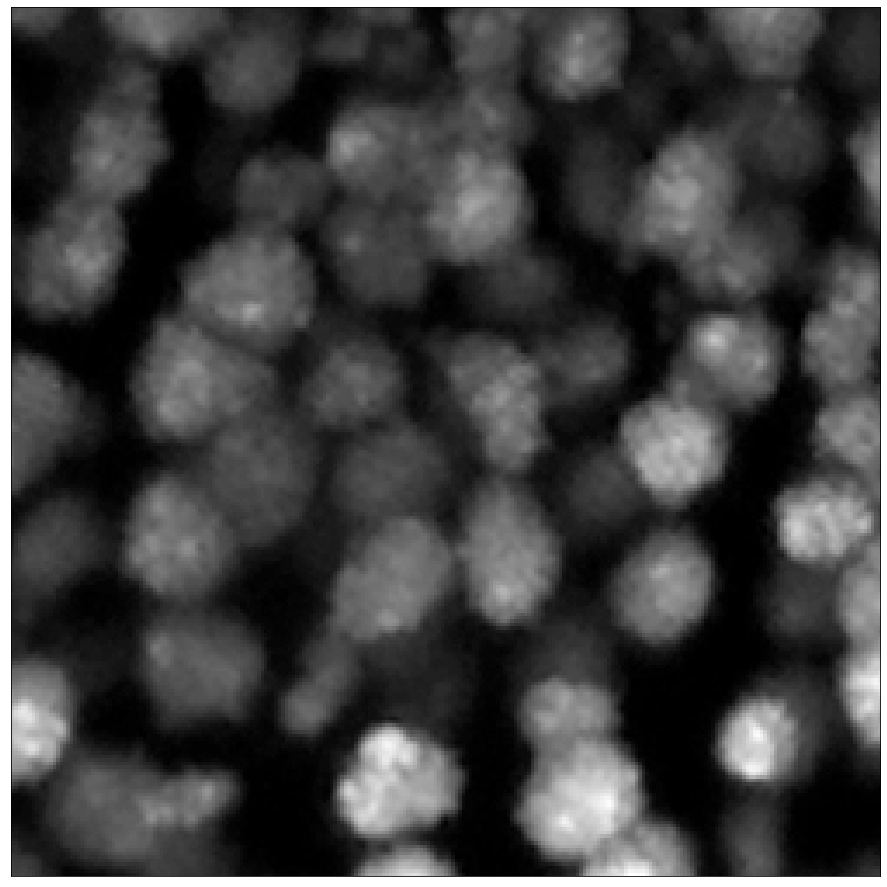

In [3]:
plt.figure(figsize=(16, 16))
plt.imshow((img)[3960:4211, 4253:4504], 'gray')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig('FigureS1_B_input.png')

In [4]:
# Gobal threshold
_, img = cv2.threshold(img.copy(), 5, 255, cv2.THRESH_TOZERO)

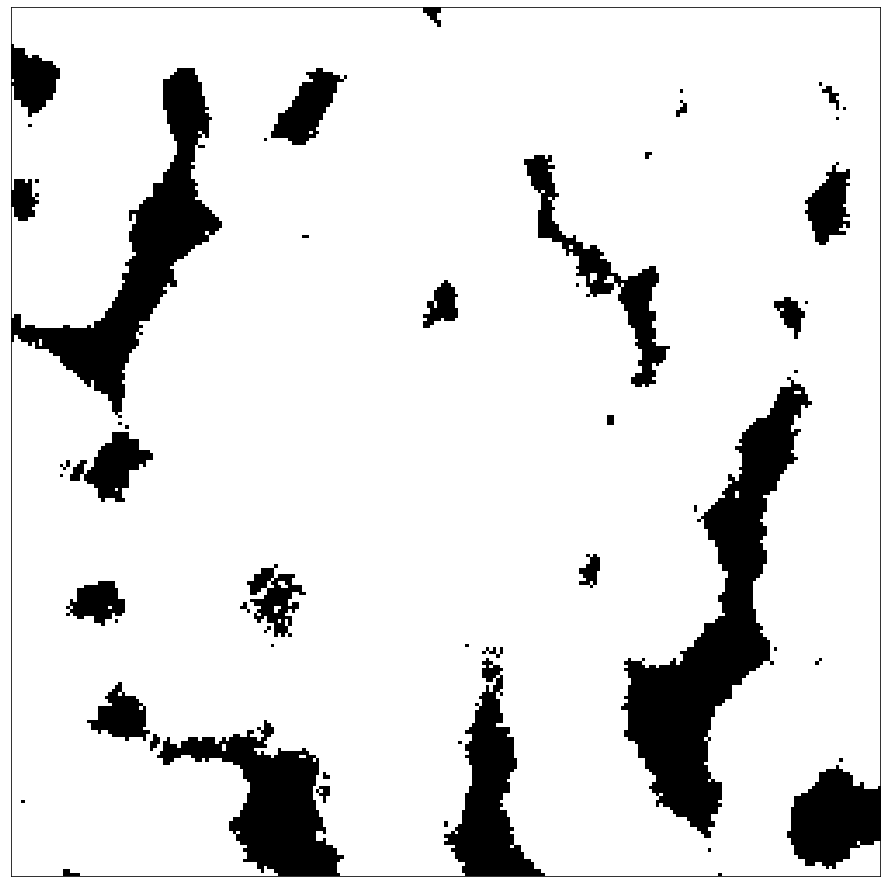

In [5]:
plt.figure(figsize=(16, 16))
plt.imshow((img>0)[3960:4211, 4253:4504], 'gray')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig('FigureS1_B_gobal.png')

In [6]:
# Local threshold
threshold = filters.threshold_local(img,block_size=41,offset=0.003)

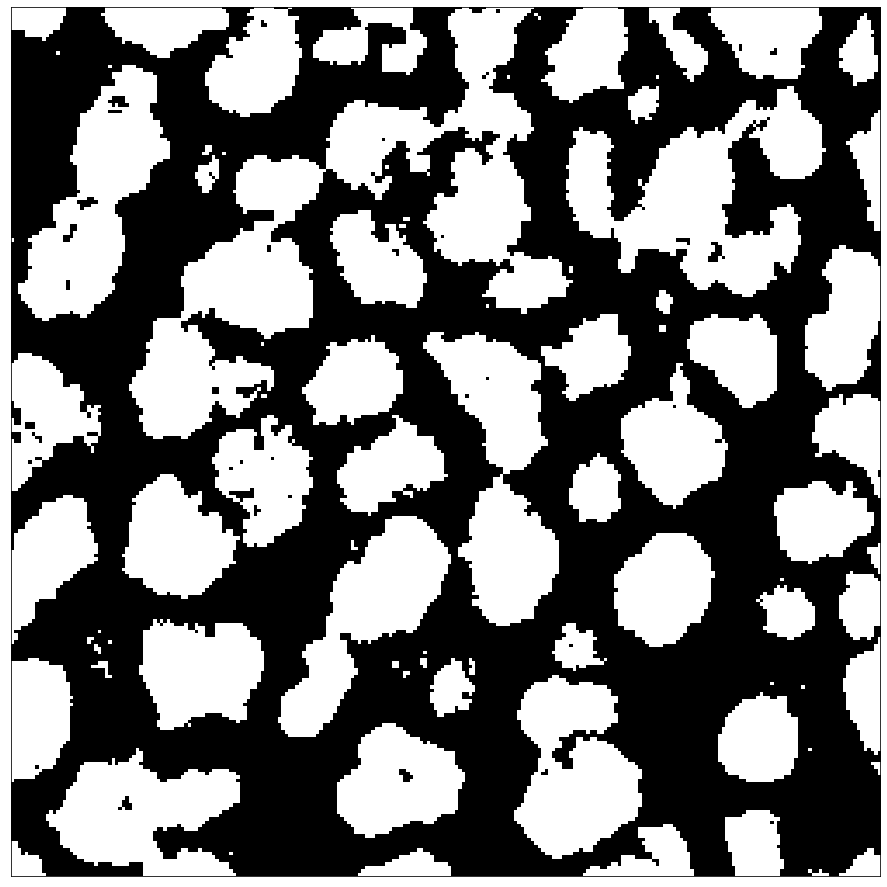

In [7]:
plt.figure(figsize=(16, 16))
plt.imshow((img>threshold)[3960:4211, 4253:4504], 'gray')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig('FigureS1_B_local.png')

In [8]:
# Distance
distance = ndi.distance_transform_edt(img>threshold)

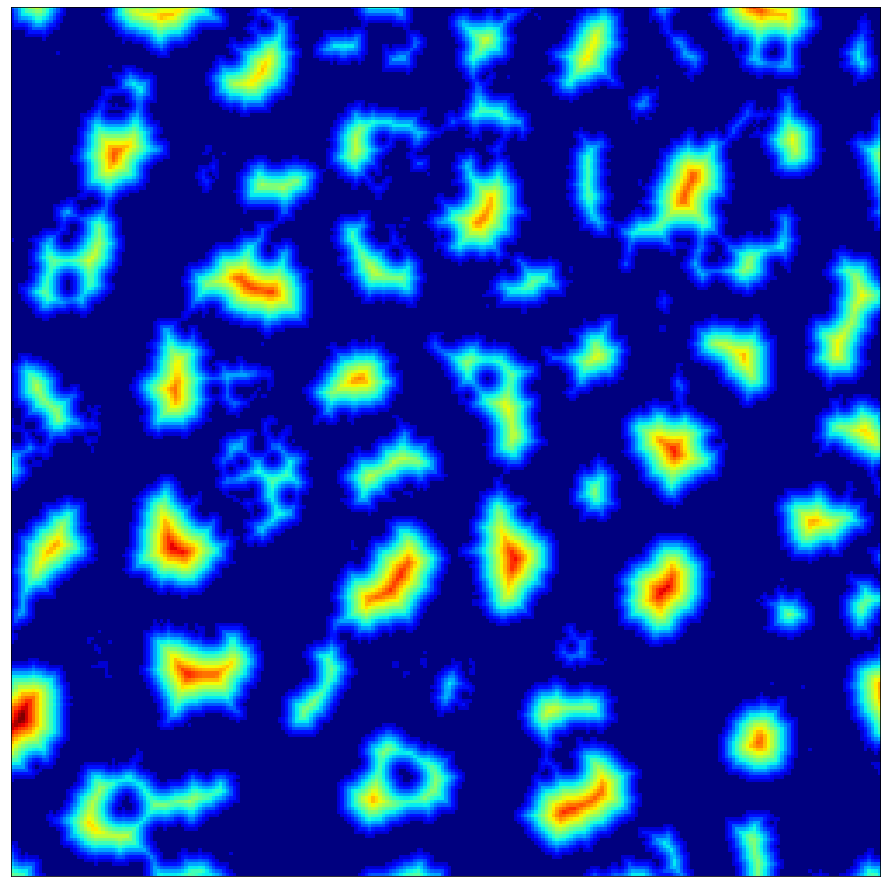

In [9]:
plt.figure(figsize=(16, 16))
plt.imshow((distance)[3960:4211, 4253:4504], 'gray')
plt.jet()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig('FigureS1_B_distance.png')

In [10]:
# Markers
local_max_coords = feature.peak_local_max(distance, min_distance=15)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)
local_max_c = np.zeros(distance.shape, dtype=np.uint8)
i = 1
for y,x in local_max_coords:
    cv2.line(local_max_c, (x-4,y), (x+4,y), i, 3)
    cv2.line(local_max_c, (x,y-4), (x,y+4), i, 3)
    i=i+1
    if i == 255:
        i = 1

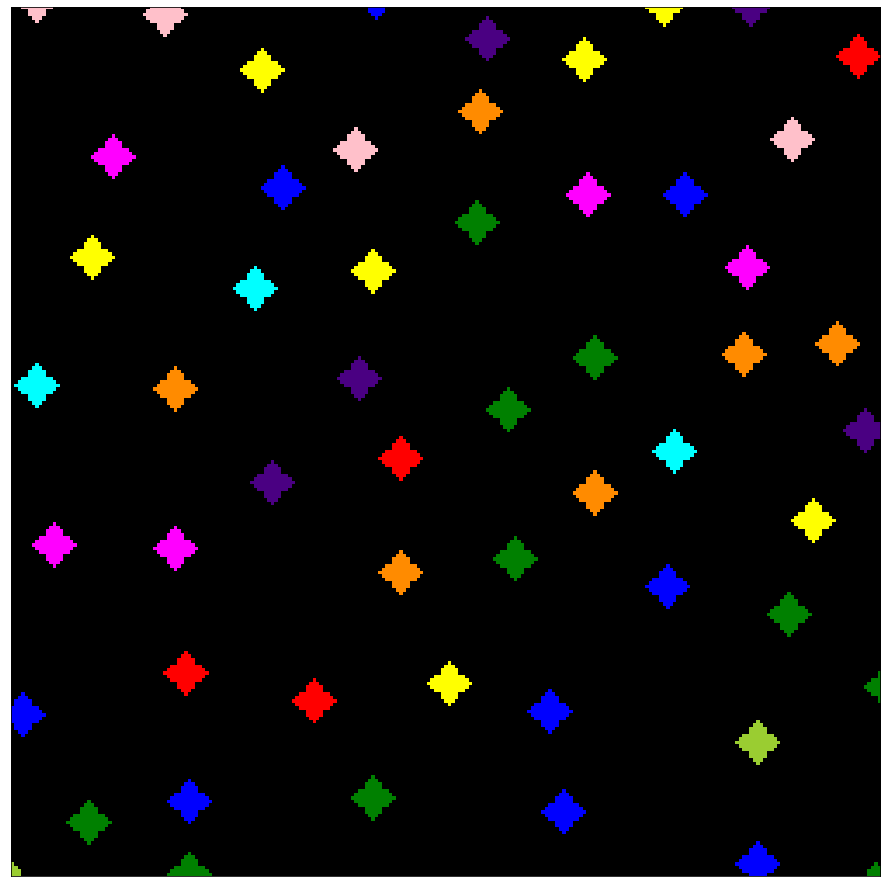

In [11]:
plt.figure(figsize=(16, 16))
plt.imshow((color.label2rgb(local_max_c, bg_label=0))[3960:4211, 4253:4504])
plt.jet()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig('FigureS1_B_markers.png')

In [12]:
# Segmentation
segmented_cells = segmentation.watershed(-distance, markers,mask=img,watershed_line=True)
label = color.label2rgb(segmented_cells, bg_label=0)

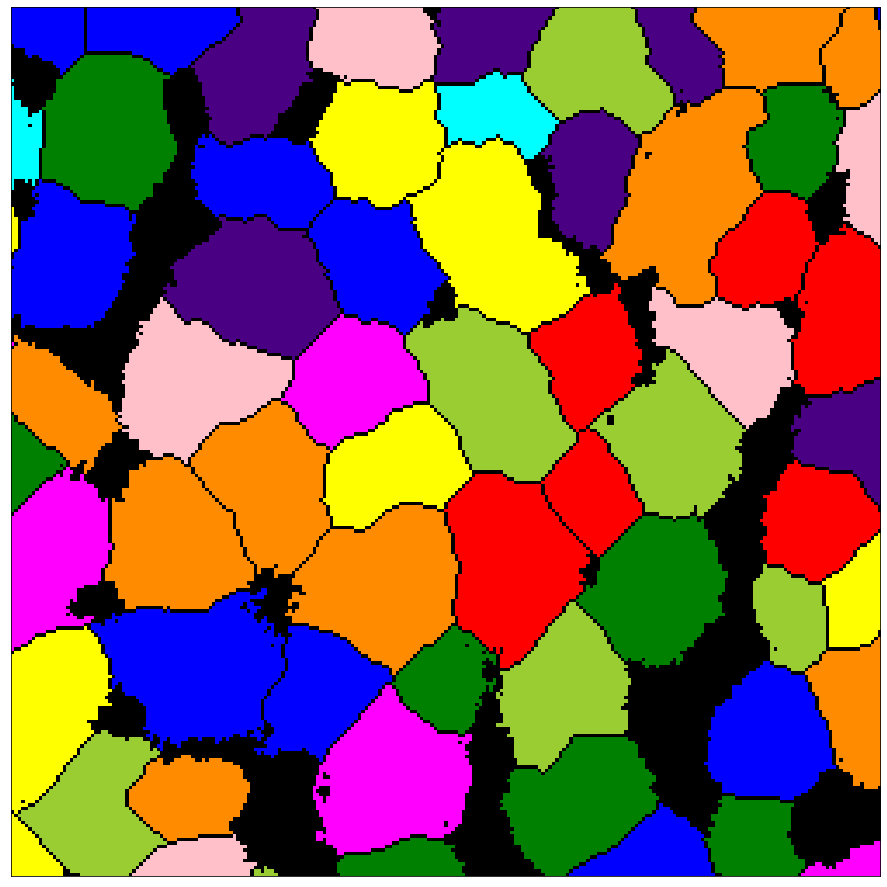

In [13]:
plt.figure(figsize=(16, 16))
plt.imshow((label)[3960:4211, 4253:4504])
plt.jet()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.savefig('FigureS1_B_laebl.png')